In [31]:
import pandas as pd
import numpy as np
#import pygeostat as gs
import matplotlib.pyplot as plt
import scipy as sc
from scipy import stats as stats
import copy as copy
%matplotlib inline

This notebook is set up to help understand creating, fitting, and understanding lognormal distributions as used in Python (Numpy and Scipy). Understandind how the terminology is used is key to understanding how to fit and use the lognormal distributions in Python.

# Creating a Lognormal Distribution

creating a random lognormal distribution is quite easy using the numpy package. However the terminology is slightly different. Below we will create a distribution plot it and then look at some of the descriptive stats.

In [13]:
mu = 1
sigma = 2
# Create a lognormal distribution using mu and sigma
dist = np.random.lognormal(mu, sigma, 10000)

In order to plot the lognormal distribution in python we need to find values for x and values for the pdf given x. To do that we a value for the shape. Which we can get using scipy

In [28]:
shape, loc, scale = stats.lognorm.fit(dist)
x = np.linspace(stats.lognorm.ppf(0.001, shape), stats.lognorm.ppf(0.999, shape), 10000)
pdf = stats.lognorm.pdf(x, shape)
print('shape = ', shape, '\nLocation = ', loc, '\nScale = ', scale)

shape =  2.01918380105 
Location =  0.000996428325574 
Scale =  2.72379081227


Once we have the shape we can use scipy again to caclulate the x and the pdf which will be used to plot the distribution

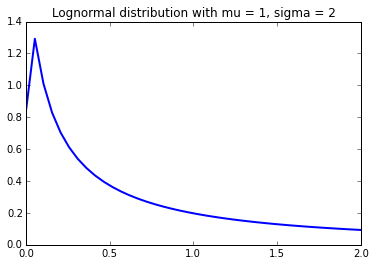

In [37]:
plt.plot(x, pdf, linewidth=2, color='blue', label='mu=1, sigma=2')
plt.xlim(0,2)
plt.title('Lognormal distribution with mu = 1, sigma = 2')

As shown here the mu and the sigma don't appear to actually be 1 and 2... So What's going on? Lets delve into some more descriptive stats then.

In [39]:
print('The mean of the distribution = ', dist.mean(), '\n The Standard deviation of the dsitribution = ', dist.std())

The mean of the distribution =  19.8528416598 
 The Standard deviation of the dsitribution =  92.5095738787


Huh? What's going on here? I thought the mean and the standard deviation were 1 and 2? Well no we will show what scipy means by mu and sigma.... no pun intended.

In [43]:
print('The mean of the ln of the distribution = ', np.mean(np.log(dist)), 
      '\n The Standard deviation of the ln of the dsitribution = ', np.std(np.log(dist)))

The mean of the ln of the distribution =  1.00476795268 
 The Standard deviation of the ln of the dsitribution =  2.01388347611


As you can see above if you take the log of the distribution and find the mean or the standard deviation of the log then you will get back to the mean = 1 and sigma = 2.  
This can be misleading however since what you create a new distribution with the same mean but a different sigma? Or the same sigma but a different log? That doesn't mean it will translate like we think.

In [61]:
mu = 1
sigma = 1
# Create a lognormal distribution using mu and sigma
dist = np.random.lognormal(mu, sigma, 10000)
print('----Taking the log of the distribution first gets us back to the mean and sigma.-----')
print('The mean of the ln of the distribution = ', np.mean(np.log(dist)), 
      '\n The Standard deviation of the ln of the dsitribution = ', np.std(np.log(dist)))
print('\n----Taking the mean and sigma of the distribution can be quite a bit different-----')
print('The mean of the distribution = ', dist.mean(), 
      '\n The Standard deviation of the distribution = ', dist.std())

----Taking the log of the distribution first gets us back to the mean and sigma.-----
The mean of the ln of the distribution =  0.985724097779 
 The Standard deviation of the ln of the dsitribution =  0.996148562703

----Taking the mean and sigma of the distribution can be quite a bit different-----
The mean of the distribution =  4.37008180933 
 The Standard deviation of the dsitribution =  5.5178267231


We can plot the new distribution to see what it looks like

In [62]:
shape, loc, scale = stats.lognorm.fit(dist)
x = np.linspace(stats.lognorm.ppf(0.001, shape), stats.lognorm.ppf(0.999, shape), 10000)
pdf = stats.lognorm.pdf(x, shape)
print('shape = ', shape, '\nLocation = ', loc, '\nScale = ', scale)

shape =  0.985361560283 
Location =  -0.0176678991048 
Scale =  2.708768444


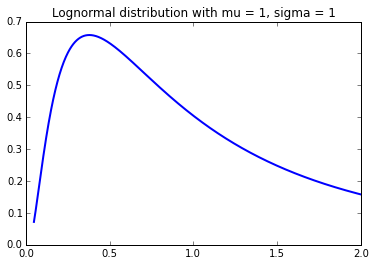

In [65]:
plt.plot(x, pdf, linewidth=2, color='blue', label='mu=1, sigma=2')
plt.xlim(0,2)
plt.title('Lognormal distribution with mu = 1, sigma = 1')

Higher variance can give us even worse results

In [64]:
mu = 1
sigma = 4
# Create a lognormal distribution using mu and sigma
dist = np.random.lognormal(mu, sigma, 10000)
print('----Taking the log of the distribution first gets us back to the mean and sigma.-----')
print('The mean of the ln of the distribution = ', np.mean(np.log(dist)), 
      '\n The Standard deviation of the ln of the dsitribution = ', np.std(np.log(dist)))
print('\n----Taking the mean and sigma of the distribution can be quite a bit different-----')
print('The mean of the distribution = ', dist.mean(), 
      '\n The Standard deviation of the distribution = ', dist.std())

----Taking the log of the distribution first gets us back to the mean and sigma.-----
The mean of the ln of the distribution =  1.00297438057 
 The Standard deviation of the ln of the dsitribution =  3.98865235363

----Taking the mean and sigma of the distribution can be quite a bit different-----
The mean of the distribution =  8835.55763537 
 The Standard deviation of the dsitribution =  262642.655707


### The questions that then arise are:  
What is this mu and sigma that python uses?  
If you know the mean and the variance of the distribution that you want.  
  - how do you calculate the mu and the sigma?

In [66]:
m = 1  # Mean of the distribution
v = 2  # Variance of the distribution
phi = np.sqrt(v + m**2)
mu = np.log(m**2/phi)     # mean of log(distribution)
sigma = np.sqrt(np.log(phi**2/m**2)) # std dev of log(distribution)
print('mu = ', mu, '\nsigma = ', sigma)

mu =  -0.549306144334 
sigma =  1.04814707397


In [68]:
dist = np.random.lognormal(mu, sigma, 10000)
print('The mean of the distribution = ', dist.mean(), 
      '\n The Standard deviation of the distribution = ', dist.std(),
      '\n The Variance of the distribution = ',(dist.std()**2))

The mean of the distribution =  1.0112919888 
 The Standard deviation of the distribution =  1.39245591593 
 The Variance of the distribution =  1.9389334778


Lets test this again by keeping the mean the same and changing the variance

In [69]:
m = 1  # Mean of the distribution
v = 1  # Variance of the distribution
phi = np.sqrt(v + m**2)
mu = np.log(m**2/phi)     # mean of log(distribution)
sigma = np.sqrt(np.log(phi**2/m**2)) # std dev of log(distribution)
print('mu = ', mu, '\nsigma = ', sigma)

mu =  -0.34657359028 
sigma =  0.832554611158


In [70]:
dist = np.random.lognormal(mu, sigma, 10000)
print('The mean of the distribution = ', dist.mean(), 
      '\n The Standard deviation of the distribution = ', dist.std(),
      '\n The Variance of the distribution = ',(dist.std()**2))

The mean of the distribution =  1.00086136404 
 The Standard deviation of the distribution =  1.01562546858 
 The Variance of the distribution =  1.03149509242


You can then use the following function to generate a lognormal distribution given the mean and variance of the distribution

In [ ]:
def rand_lognorm_dist(mean, variance, num_data=10000):
    phi = np.sqrt(variance + mean**2)
    mu = np.log(mean**2/phi)     # mean of log(distribution)
    sigma = np.sqrt(np.log(phi**2/mean**2)) # std dev of log(distribution)
    dist = np.random.lognormal(mu, sigma, num_data)
    
    return dist, mu, sigma